---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 6

---
Please write your full name here
- **Name** : "Rahma abdelkader mohmed"

# Part 1 PCA

In [629]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline


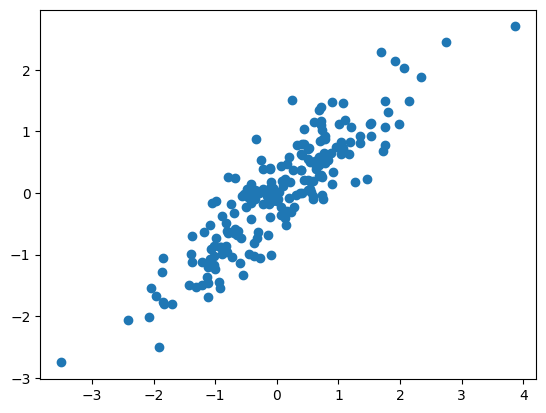

In [630]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [631]:
import numpy as np

def pca(X):
    # Center the data
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean
    
    # Compute covariance matrix
    cov_matrix = np.cov(X_centered.T)
    
    # Compute eigenvalues and eigenvectors of covariance matrix
    eig_values, eig_vectors = np.linalg.eig(cov_matrix)
    
    # Sort eigenvectors by eigenvalue in descending order
    sort_indices = np.argsort(eig_values)[::-1]
    sorted_eig_vectors = eig_vectors[:, sort_indices]
    sorted_eig_values = eig_values[sort_indices]
    
    # Transform data
    X_transformed = X_centered @ sorted_eig_vectors
    
    return sorted_eig_vectors, sorted_eig_values, X_transformed

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA vectors over the ORIGINAL data

In [632]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalues, X_transformed = pca(X) 


In [633]:
print("Eigenvalues are: ", sorted_eigenvalues)

Eigenvalues are:  [1.82927343 0.10246373]


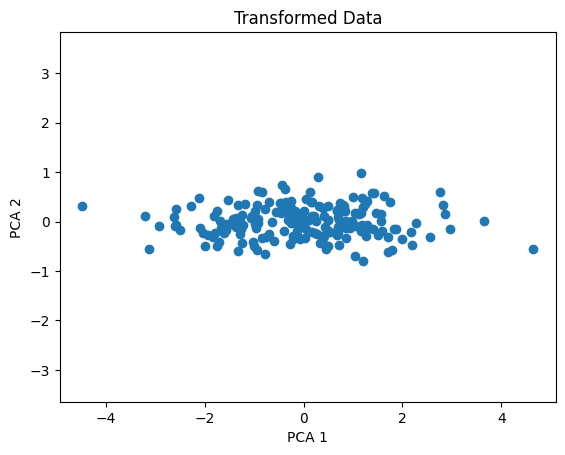

In [634]:

### Plot transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.title('Transformed Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.axis('equal');
plt.show()

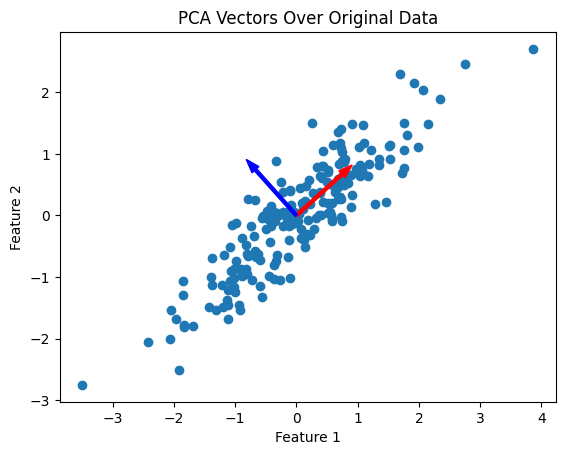

In [635]:
# Plot the PCA vectors over the original data
plt.scatter(X[:, 0], X[:, 1])
plt.arrow(0, 0, sorted_eigenvectors[0, 0], sorted_eigenvectors[1, 0], color='red', width=0.05)
plt.arrow(0, 0, sorted_eigenvectors[0, 1], sorted_eigenvectors[1, 1], color='blue', width=0.05)
plt.title("PCA Vectors Over Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

In [636]:
from sklearn.decomposition import PCA
# Apply PCA to the data
pca = PCA()
pca.fit(X)

# Print the PCA eigenvalues
print("PCA eigenvalues:", pca.explained_variance_)

PCA eigenvalues: [1.82927343 0.10246373]


## Question 4
- Appl sklearn PCA using 1 component only
- print shape of transformed data
- plot the transformed data

In [637]:
pca = PCA(n_components=1)
X_transformed = pca.fit_transform(X)
# Print the shape of the transformed data
print("Transformed data shape:", X_transformed.shape)

Transformed data shape: (200, 1)


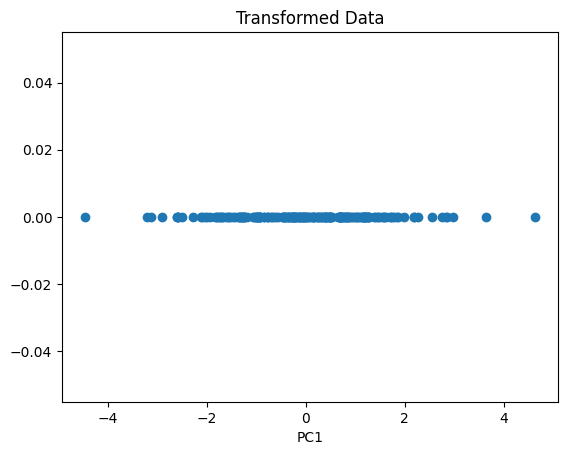

In [638]:
# Plot the transformed data
plt.scatter(X_transformed, np.zeros_like(X_transformed))
plt.title("Transformed Data")
plt.xlabel("PC1")
plt.show()

# Part 2 SVM

### Use the following function to plot the classification regions

In [639]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [640]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=42 and 20% of the data for testing)

In [641]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Question 2
1. Train an SVM classifier using linear kernel (use SVC)
2. Plot the classification regions using the training dataset.

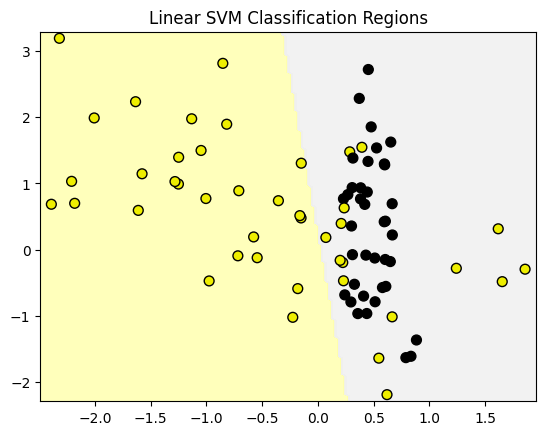

In [642]:
from sklearn.svm import SVC
# Train an SVM classifier using a linear kernel
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)

# Plot the classification regions using the training dataset
plot_class_regions_for_classifier(svm_clf, X_train, y_train, title='Linear SVM Classification Regions')

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00002.
2. Train another SVM classifier using linear kernel with C=200
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

In [643]:
# Train an SVM classifier with linear kernel and C=0.00002
svm_clf1 = SVC(kernel='linear', C=0.00002)
svm_clf1.fit(X_train, y_train)


SVC(C=2e-05, kernel='linear')

In [644]:
# Train another SVM classifier with linear kernel and C=200
svm_clf2 = SVC(kernel='linear', C=200)
svm_clf2.fit(X_train, y_train)

SVC(C=200, kernel='linear')

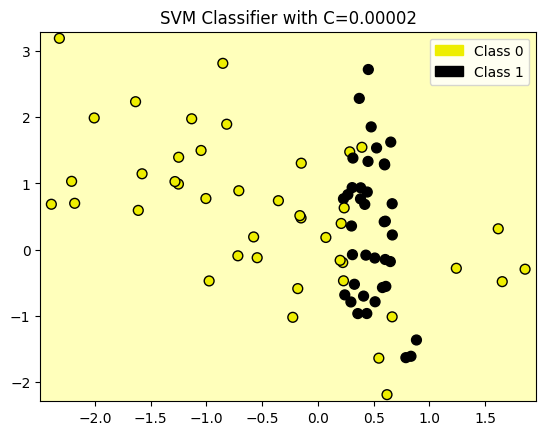

In [645]:
import matplotlib.patches as mpatches

# Plot the classification regions for the first SVM classifier
plot_class_regions_for_classifier(svm_clf1, X_train, y_train, title='SVM Classifier with C=0.00002', target_names=['Class 0', 'Class 1'])

In [646]:
# Train another SVM classifier with linear kernel and C=200
svm_clf2 = SVC(kernel='linear', C=200)
svm_clf2.fit(X_train, y_train)

SVC(C=200, kernel='linear')

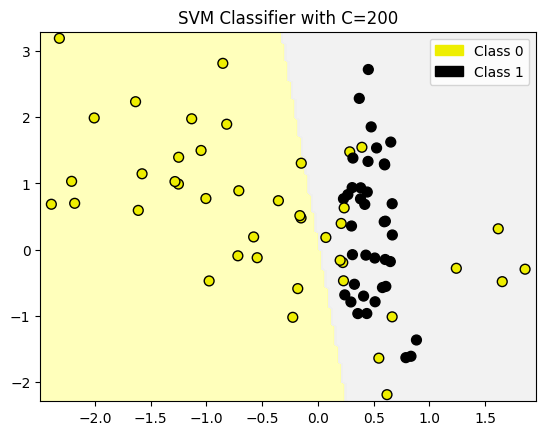

In [647]:
# Plot the classification regions for the second SVM classifier
plot_class_regions_for_classifier(svm_clf2, X_train, y_train, title='SVM Classifier with C=200', target_names=['Class 0', 'Class 1'])

### comment : The choice of the regularization parameter C in an SVM classifier is a trade-off between underfitting and overfitting. A larger value of C will result in a model that is less regularized, meaning it may be close to overfitting the training data. On the other hand, a smaller value of C will result in a more regularized model, meaning it may be close to underfitting the training data.

### Use the fruits dataset in questions 4, 5, 6.

In [648]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=42, and 20% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm using random_state=42, C=10

In [649]:
# Split the data into X_fruits and y_fruits
X_fruits = fruits[feature_names_fruits].values
y_fruits = fruits['fruit_label'].values

In [650]:
# Define the feature names for the fruit data
feature_names = ['height', 'width']

# Split the data into X and y
X = fruits[feature_names]
y = fruits['fruit_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [651]:
from sklearn.svm import LinearSVC

# Train a linear SVM with C=10
clf=LinearSVC(random_state=42,C=10)
#clf = SVC(kernel='linear' ,C=10)
clf.fit(X_train, y_train)
clf.score(X_train,y_train)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6382978723404256

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

###    4 models due to 4 labels in the dataset

In [652]:
print("SVM coefficients : \n ",clf.coef_)
print(" \n SVM intercept: ",clf.intercept_)

SVM coefficients : 
  [[-0.22459715  0.76048347]
 [-1.70338354  1.18717003]
 [-0.0062549   0.3183943 ]
 [ 1.14746624 -1.71656282]]
 
 SVM intercept:  [-3.42751628  1.46849592 -3.01719598  1.66954999]


In [653]:
X_train=np.array(X_train)
y_train=np.array(y_train)


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


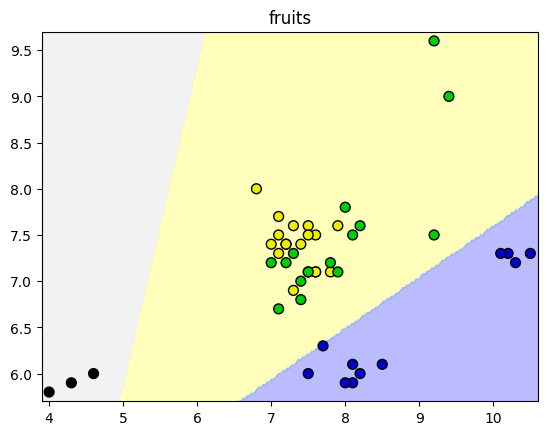

In [654]:
plot_class_regions_for_classifier(clf, X_train, y_train, X_test=None, y_test=None, title="fruits", target_names = None, plot_decision_regions = True)

### using LinearSVC it plotted 3 regions but it supposed to be 4 ,so i tried using svc(kernel='linear')

In [655]:
X_fruits = fruits.iloc[:,[4,5]]
y_fruits = fruits['fruit_label']
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_fruits,y_fruits, random_state=42 ,test_size=0.2)
clf_linear = SVC(kernel='linear',C=10, random_state=42)


In [656]:
X_train_linear=np.array(X_train_linear)
y_train_linear=np.array(y_train_linear)
clf_linear.fit(X_train_linear, y_train_linear)
clf_linear.score(X_train_linear,y_train_linear)

0.8297872340425532

In [657]:
print("the model coefficient", clf_linear.coef_)
print("the model intercepts", clf_linear.intercept_)

the model coefficient [[ 0.36269408  0.62176129]
 [ 2.06441743 -3.22539809]
 [ 2.63699296 -1.09874807]
 [-0.20771511 -0.74183969]
 [ 0.         -0.68965518]
 [ 3.47672473 -1.44863984]]
the model intercepts [ -6.03626612   8.85553464  -9.15259475   5.65875364   4.17241386
 -11.74851735]


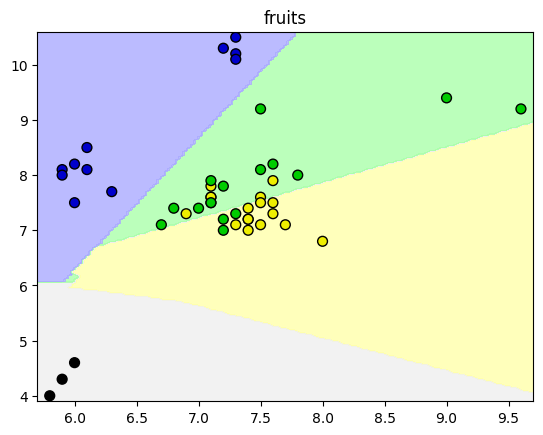

In [658]:
plot_class_regions_for_classifier(clf_linear, X_train_linear,y_train_linear, title='fruits', plot_decision_regions = True)

In [659]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 42, and 20% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM  (SVC) classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [660]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=42 ,test_size=0.2)
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv=10)
clf.fit(X_train, y_train)
print('params : ' , clf.best_params_)
clf.score(X_train,y_train)



params :  {'C': 10, 'kernel': 'poly'}


0.9164835164835164

In [661]:
clf.score(X_test,y_test)

0.9298245614035088

#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [662]:

from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=42 ,test_size=0.2)

clf = SVC(kernel='rbf',C=10)
clf.fit(X_train, y_train)

# Print the accuracy on the training and test sets
print('Accuracy of SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Accuracy of SVC on training set: 0.92
Accuracy of SVC on test set: 0.95


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [663]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

PipelineModel = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=0, C=10))
PipelineModel.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, random_state=0))])

In [664]:
# Print the accuracy on the training and test sets
print('Accuracy of SVC on training set: {:.2f}'.format(PipelineModel.score(X_train, y_train)))
print('Accuracy of SVC on test set: {:.2f}'.format(PipelineModel.score(X_test, y_test)))

Accuracy of SVC on training set: 0.99
Accuracy of SVC on test set: 0.97
